**Hyperparameter tuning**

- The parameters or arguments of model can change by user to get the good model performance

- Grid Search

- Random Search

- Assume that 

In [1]:
from sklearn.tree import DecisionTreeClassifier


In [2]:
DecisionTreeClassifier()

DecisionTreeClassifier()

**Cross validation** CV


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [4]:
data=pd.read_csv("Preprocessed_data.csv")
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [5]:
# Here the target column is Customer Status
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [7]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree = DecisionTreeClassifier()

In [8]:
param_grid={"criterion":["gini","entropy"],
           'max_depth':[3,4,5,6,7,8],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[1,2,3,4],
           'random_state':[0,42]}


In [9]:
import time

start=time.time()
grid_search=GridSearchCV(grid_tree,
                         param_grid,
                         scoring='accuracy',
                         cv=5,
                         verbose=True)

end=time.time()
print("total time taken is : ",(end-start))

total time taken is :  0.0


In [10]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [11]:
import time

start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("total time taken is : ",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is :  82.24051308631897


In [12]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=0)

In [35]:
grid_search.best_score_

0.7911075008941972

In [36]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

**Cross validation scroe**

In [13]:
accuracy_list=cross_val_score(grid_search.best_estimator_,X_train,y_train,scoring='accuracy')

In [14]:
accuracy_list.mean()

0.7911075008941972

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=0)

In [16]:
y_pred_dt=dtree.predict(X_test)

In [17]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("Accuracy is  : {}".format(acc_dt))
print("Precision is : {}".format(precision_dt))
print("Recall is    : {}".format(recall_dt))
print("F1 is        : {}".format(f1_dt))

Accuracy is  : 80.87
Precision is : 0.88
Recall is    : 0.84
F1 is        : 0.86


In [22]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       305
           1       0.88      0.84      0.86       662

    accuracy                           0.81       967
   macro avg       0.78      0.79      0.78       967
weighted avg       0.81      0.81      0.81       967



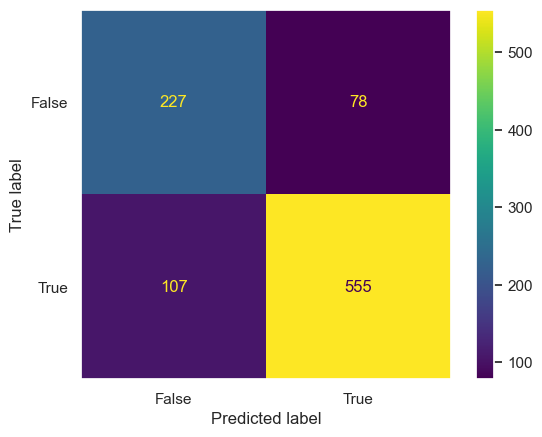

In [18]:
cmt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 227
False Postive  : 78
False Negative : 107
True Postive   : 555


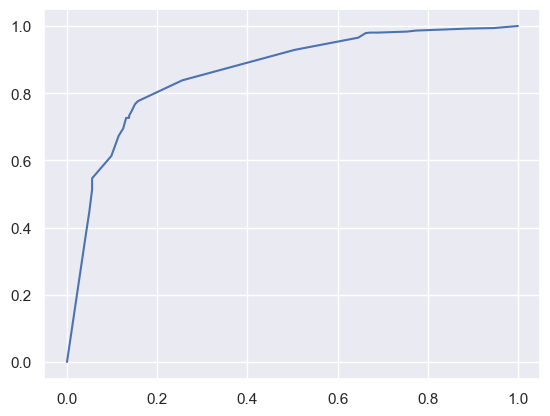

In [21]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [23]:
dtree.feature_importances_

array([0.        , 0.08769625, 0.03585805, 0.05987065, 0.01403895,
       0.01557506, 0.18863799, 0.04941705, 0.        , 0.        ,
       0.        , 0.03152153, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41715928, 0.        , 0.        , 0.06704056,
       0.00725393, 0.        , 0.        , 0.00875343, 0.01717728])

In [24]:
imp_df=pd.DataFrame({"Feature Name": X_train.columns,
                    "Importance": dtree.feature_importances_})
fi=imp_df.sort_values(by="Importance",ascending=False)
fi

,Feature Name,Importance
21,Contract,0.417159
6,Number of Referrals,0.188638
1,Age,0.087696
24,Monthly Charge,0.067041
3,Number of Dependents,0.059871
7,Tenure in Months,0.049417
2,Married,0.035858
11,Internet Type,0.031522
29,Total Revenue,0.017177
5,Longitude,0.015575


### Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression
